# UE Computer Vision | Project : Visual tracking of video objects

**Students:**
- Maria FLORENZA LAMBERTI - maria.florenza-lamberti@imt-atlantique.net
- Dely ARDILA MEDINA - dely.ardila-medina@imt-atlantique.net
- Nhan NGUYEN - nhan.nguyen@imt-atlantique.net

---

## Import Libraries

In [ ]:
from imageio.v2 import imread #, imwrite, imsave
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib.pyplot as plt
from util import visualize_boundaries, create_gif

---

## Data

In [14]:
img_path = 'sequences-train'
flow_path = 'sequences-train/flow'
name = 'bear'

flow_files = sorted(glob.glob(os.path.join(flow_path, name + '*.npy')))
img_ext = 'bmp'
mask_ext = 'png'
img_files = sorted(glob.glob(os.path.join(img_path, name + '*.' + img_ext)))
mask_files = sorted(glob.glob(os.path.join(img_path, name + '*.' + mask_ext)))

im_begin = 1
im_end = len(img_files)

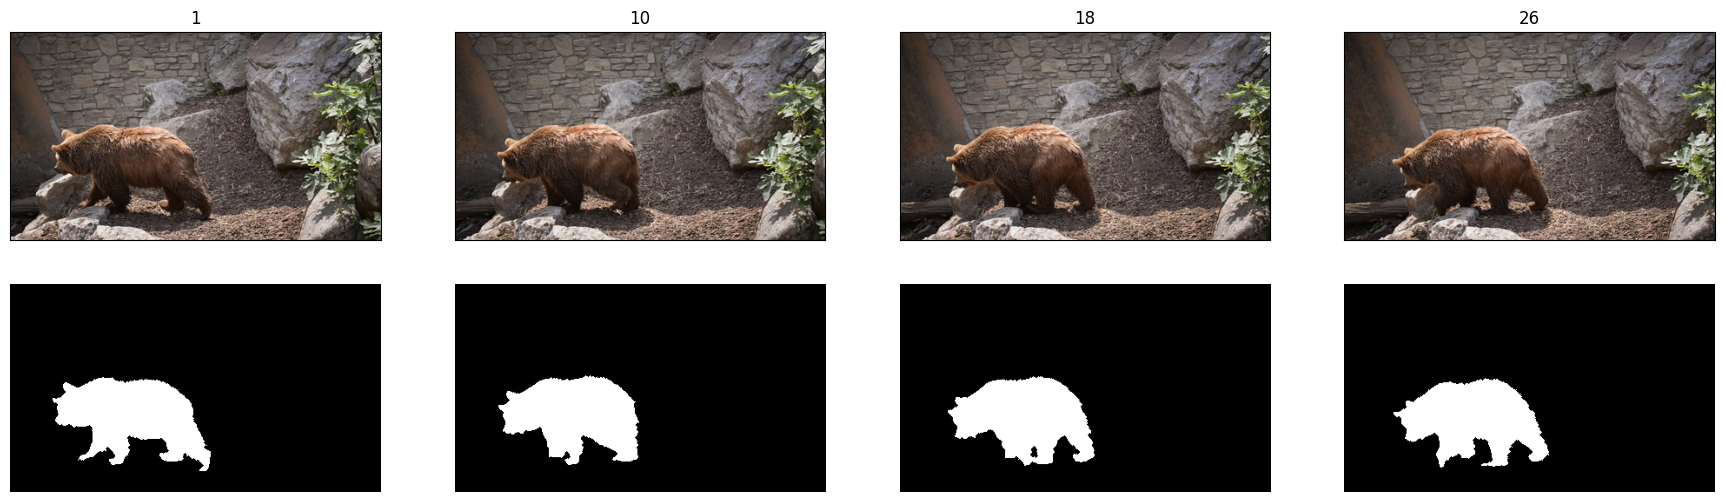

In [15]:
plt.figure(figsize=(22, 6))
for idx, im in enumerate([1,10,18,26]):
    img_current = imread('sequences-train/'+name+'-%0*d.bmp'%(3,im))
    mask_current = imread('sequences-train/'+name+'-%0*d.png'%(3,im))
    plt.subplot(2,4,idx+1), plt.title('%i' %(im)), plt.imshow(img_current), plt.xticks([]), plt.yticks([])
    plt.subplot(2,4,idx+5), plt.imshow(mask_current,cmap='gray'), plt.xticks([]), plt.yticks([])
    plt.axis('off')
plt.show()

---

## Model

We used a pretrained FlowNetS model to estimate optical flow between frames. It can be found [here](https://github.com/ClementPinard/FlowNetPytorch.git).

<!-- ![FlowNetS Model](FlowNet_model.png)
*Figure 1: FlowNet Model (Source: [Paper/Repository](link))* -->

![FlowNet Architecture](FlowNet_model.png)  
*Figure 1: FlowNet architecture, adapted from [Dosovitskiy et al., 2015](https://arxiv.org/abs/1504.06852).*



---

# Inference and tracking

To run the inference and mask propagation, use the following command:
```bash
python3 run_inference.py <sequence_name> <mode>
!python3 run_inference.py --sequences_path /path/to/sequence --model_path /path/to/pretrained/model.pth  --mode <sequential/direct> --sequence <sequence_name>

```

This line executes inference and propagates masks for the selected sequence and mode. The computed optical flow will be saved in the `sequence` folder, while the resulting masks will be stored in `results/{sequence_name}-mask/{mode}`.


## Sequential integration

In [25]:
!python3 run_inference.py --sequences_path sequences-train --model_path flownets_EPE1.951.pth --mode sequential --sequence bear

/home/cecilia/ComputerVision-FlowNet/run_inference.py:174: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  network_data = torch.load(model_path, map_location=cuda_device)
=> u

## Direct Integration

In [27]:
!python3 run_inference.py --sequences_path sequences-train --model_path flownets_EPE1.951.pth --mode direct --sequence bear

/home/cecilia/ComputerVision-FlowNet/run_inference.py:174: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  network_data = torch.load(model_path, map_location=cuda_device)
=> u

### Run Inference for All Sequences  

The following command runs inference for all sequences listed in the script, allowing processing for both training and test sets:  

```bash
python3 all_sequences_inference.py --pretrained /path/to/pretrained/model.pth --mode direct/sequential --sequence train/test
```

- `--pretrained`: Path to the pretrained model.  
- `--mode`: Tracking mode (`direct` or `sequential`).  
- `--sequence`: Specifies whether to run on the training (`train`) or test (`test`) set.  

This will compute the optical flow and propagate masks for all sequences specified in the script.

In [9]:
!python3 all_sequences_inference.py --pretrained flownets_EPE1.951.pth --mode sequential --sequence test

Running inference for the test sequence
Running inference for sequence: cow
/home/cecilia/ComputerVision-FlowNet/run_inference.py:174: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental fea

# Results visualization

## Mask result

Visualizing boundaries for sequence: fish


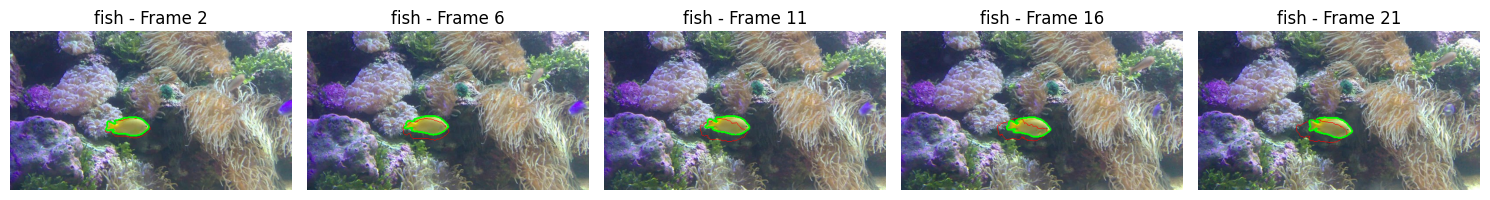

Visualizing boundaries for sequence: octopus


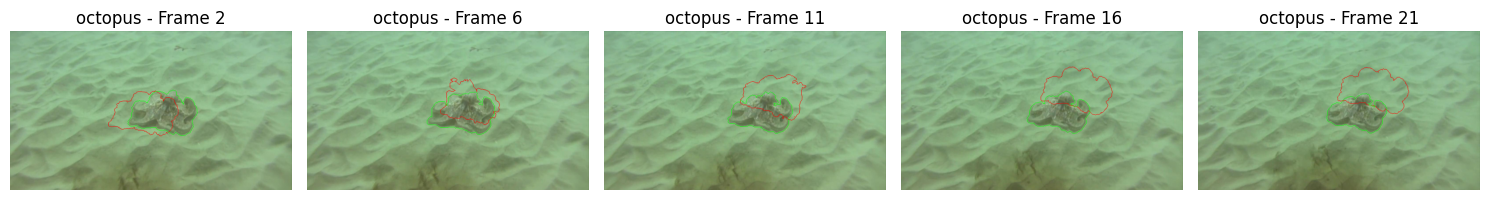

Visualizing boundaries for sequence: cow


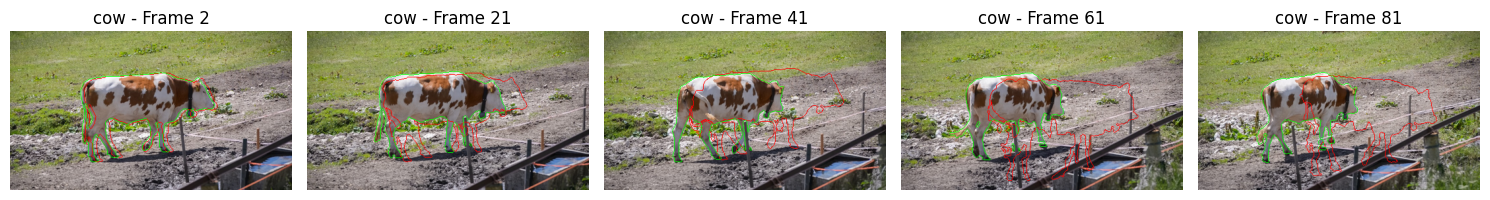

In [ ]:
# image_folder = 'sequences-train'
image_folder = 'sequences-test'
mode = 'sequential'
# mode = 'direct'

if 'train' in image_folder:
    sequence_list = ['bear', 'book', 'bag', 'camel', 'rhino', 'swan']
else:
    sequence_list = ['fish', 'octopus', 'cow']


# # Visualize boundaries for a single sequence
# sequence = 'bear'
# visualize_boundaries(sequence, mode)

# Visualize boundaries for all sequences
for sequence in sequence_list:
    print(f'Visualizing boundaries for sequence: {sequence}')
    visualize_boundaries(sequence, mode, image_folder)

In [6]:
# image_folder = 'sequences-train'
image_folder = 'sequences-test'

mode = 'direct'
# mode = 'sequential'
# model = 'finetuned'
model = 'pretrained'

if 'train' in image_folder:
    sequence_list = ['bear', 'book', 'bag', 'camel', 'rhino', 'swan']
else:
    sequence_list = ['fish', 'octopus', 'cow']


# # Create GIF for a single sequence
# sequence = 'bear'
# create_gif(sequence, mode, model)


# Create GIF for all sequences
for sequence in sequence_list:
    print(f'Generating gif for sequence: {sequence}')
    create_gif(sequence, mode, model, image_folder)


Generating gif for sequence: fish
GIF saved in: results/gif/fish-direct.gif
Generating gif for sequence: octopus
GIF saved in: results/gif/octopus-direct.gif
Generating gif for sequence: cow
GIF saved in: results/gif/cow-direct.gif


## Metrics

### Sequential

In [7]:
# Results sequential

if 'train' in image_folder:
    name = ["bear", "book", "camel", "rhino", "swan"]
else:
    name = ['fish', 'octopus', 'cow']

for i in range(len(name)):
    file_path_dice ="./results/"+name[i] +"-dice_seq.npy"
    file_path_fmeasures ="./results/"+name[i] +"-fmeasures_seq.npy"

    sequence_files = [f for f in os.listdir('sequences-train') if f.startswith(name[i]) and f.endswith(".bmp")]
    nb_start = 1
    nb_end = len(sequence_files)

    loaded_array_dice = np.load(file_path_dice)
    loaded_array_fmeasure = np.load(file_path_fmeasures)

    x = range(nb_start+1,nb_end+1)
    print(name[i])
    fig, ax = plt.subplots(figsize=(17, 6))
    ax.set_title("Sequential " + name[i])
    ax.plot(x,loaded_array_dice,marker='o',color='r')
    ax.plot(x,loaded_array_fmeasure,marker='v',color='g')
    ax.set_xlim((nb_start+1+1,nb_end+1))
    ax.set_ylim((0,100))
    ax.set_ylabel('score')
    ax.set_xlabel("im")
    ax.grid()
    ax.legend(['dice', 'Fmeasure'])
    plt.savefig('results_' + name[i] +'.png')
    plt.show()

FileNotFoundError: [Errno 2] No such file or directory: './results/fish-dice_seq.npy'

### Direct

bear


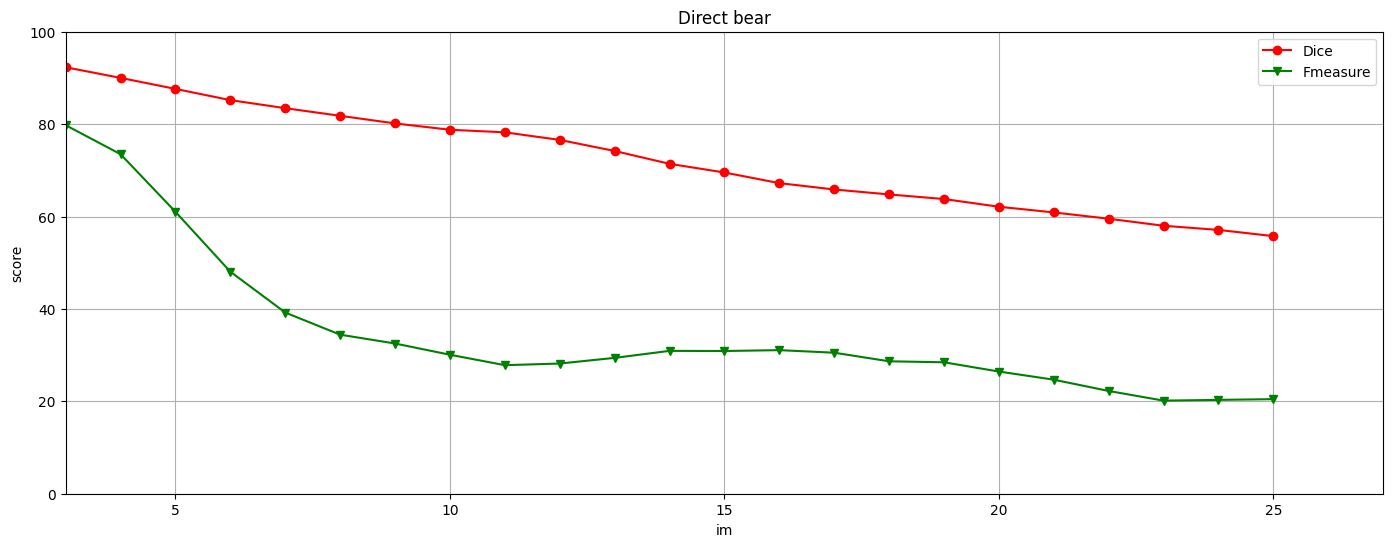

camel


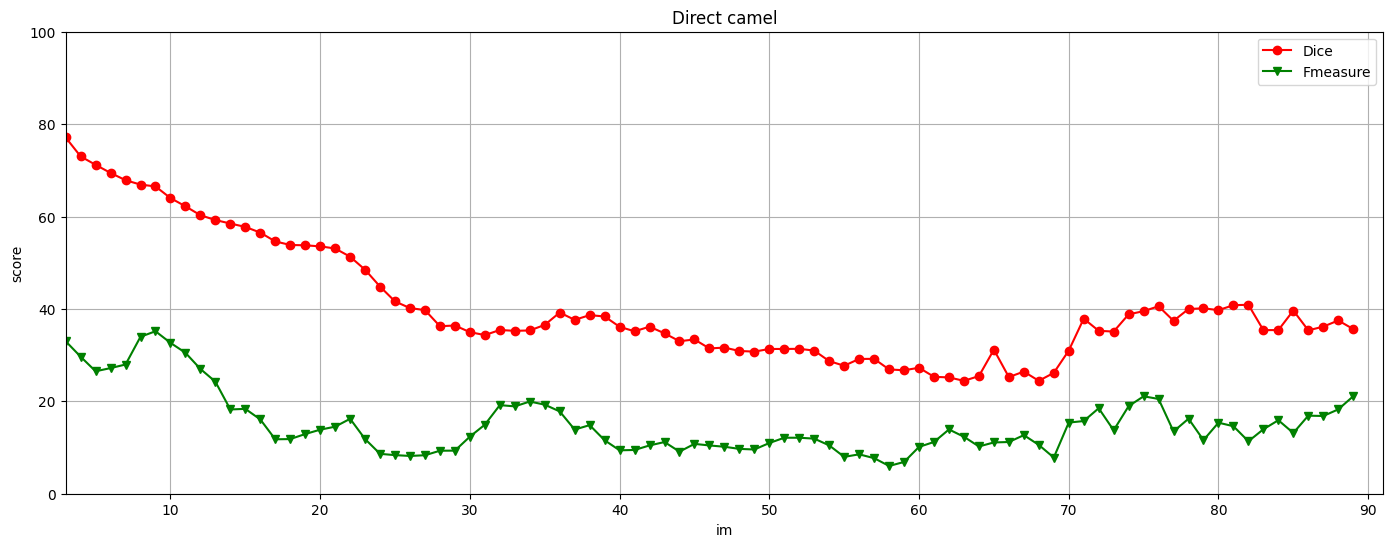

rhino


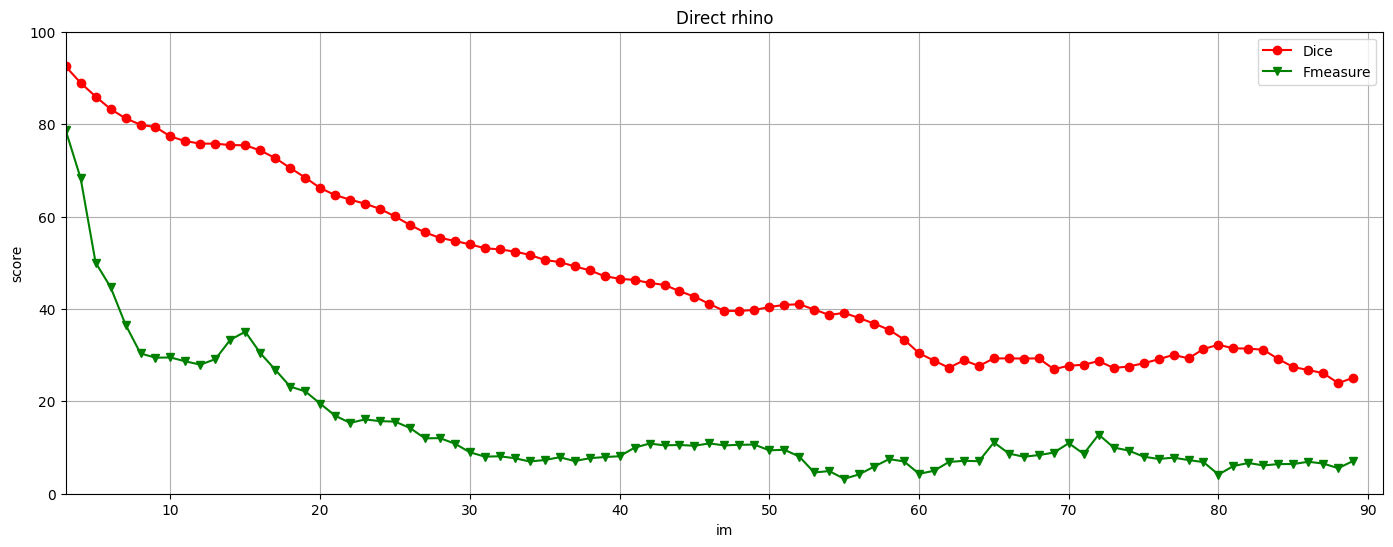

swan


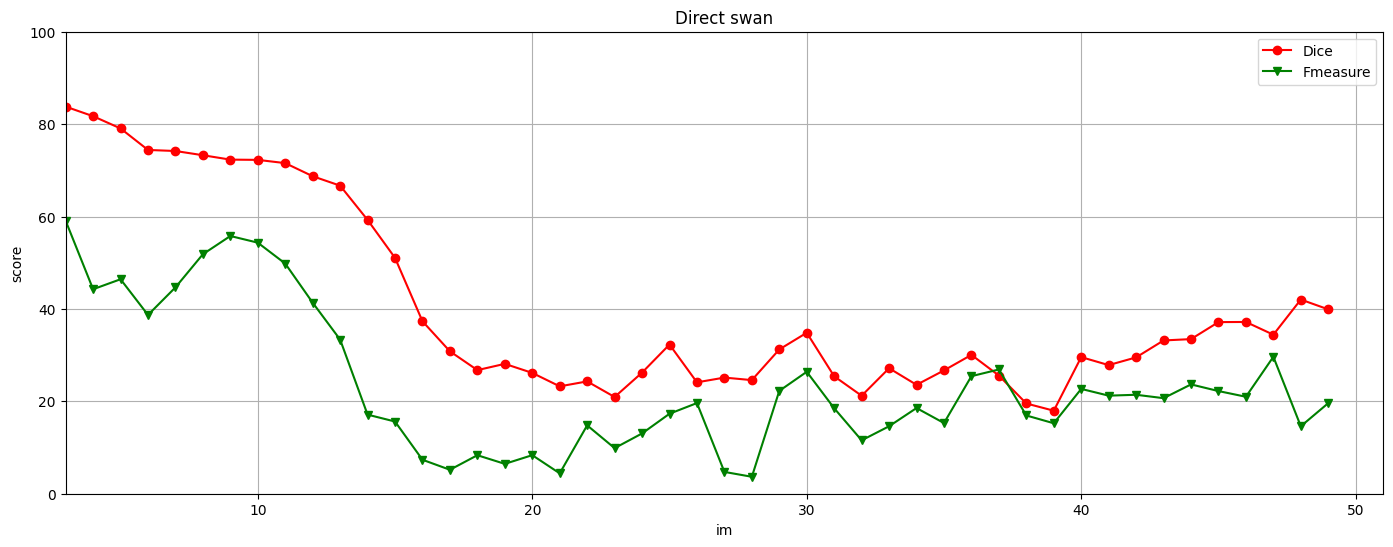

book


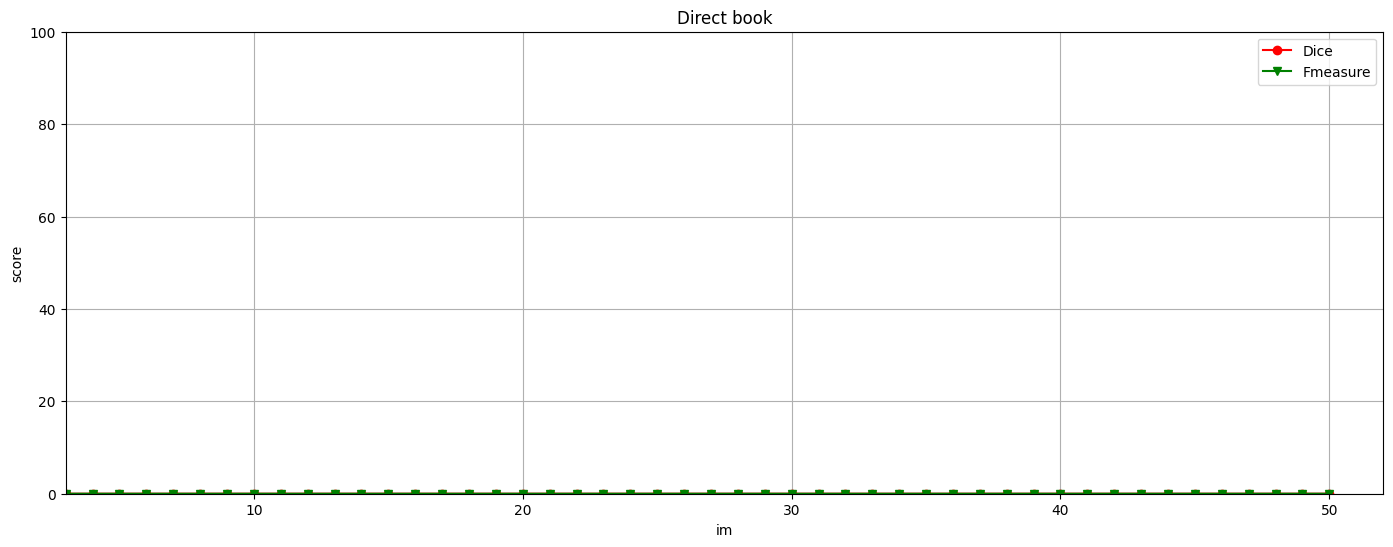

In [ ]:
name = ["bear", "camel", "rhino", "swan", "book"]

for i in range(len(name)):
    file_path_dice ="./results/"+name[i] +"-dice_dir.npy"
    file_path_fmeasures ="./results/"+name[i] +"-fmeasures_dir.npy"
    sequence_files = [f for f in os.listdir('sequences-train') if f.startswith(name[i]) and f.endswith(".bmp")]
    nb_start = 1
    nb_end = len(sequence_files)

    loaded_array_dice = np.load(file_path_dice)
    loaded_array_fmeasure = np.load(file_path_fmeasures)

    x = range(nb_start,nb_end)
    print(name[i])
    fig, ax = plt.subplots(figsize=(17, 6))
    ax.set_title("Direct " + name[i])
    ax.plot(x,loaded_array_dice,marker='o',color='r')
    ax.plot(x,loaded_array_fmeasure,marker='v',color='g')
    ax.set_xlim((nb_start+1+1,nb_end+1))
    ax.set_ylim((0,100))
    ax.set_ylabel('score')
    ax.set_xlabel("im")
    ax.grid()
    ax.legend(['Dice', 'Fmeasure'])
    plt.savefig('results_' + name[i] +'.png')
    plt.show()

### Direct x Sequential

camel


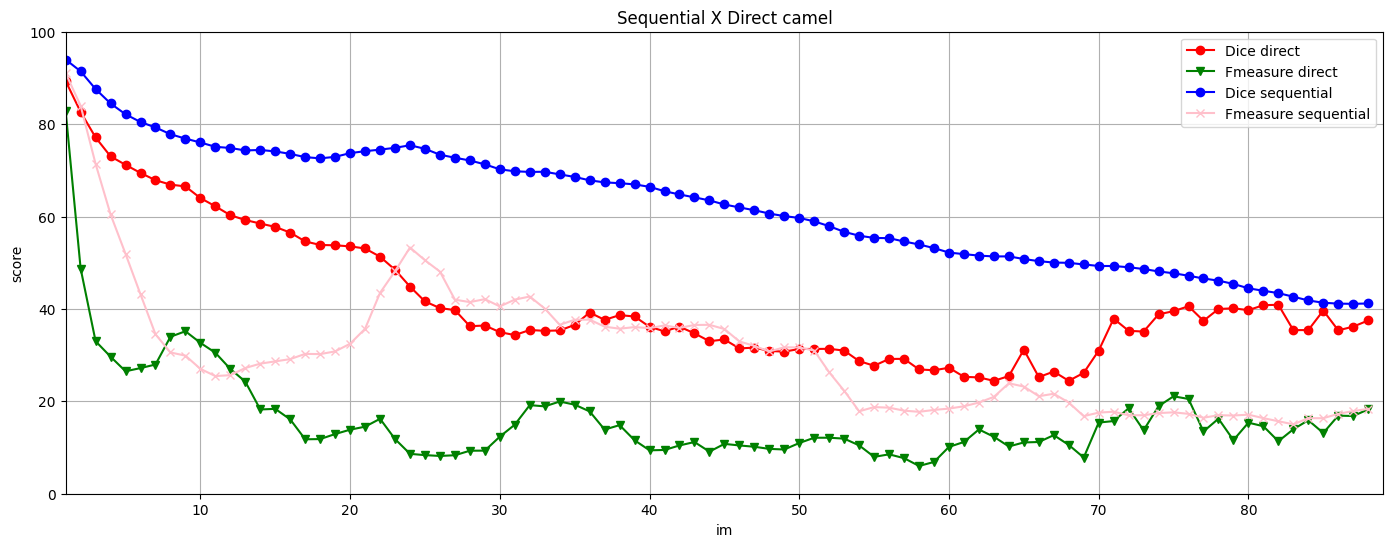

rhino


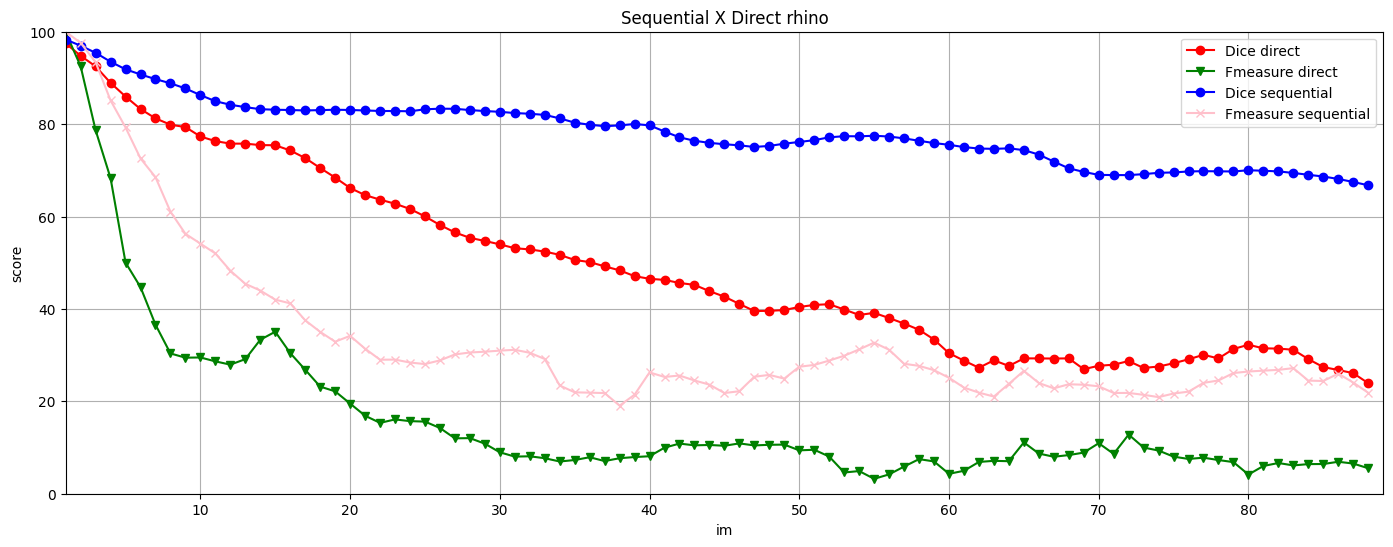

swan


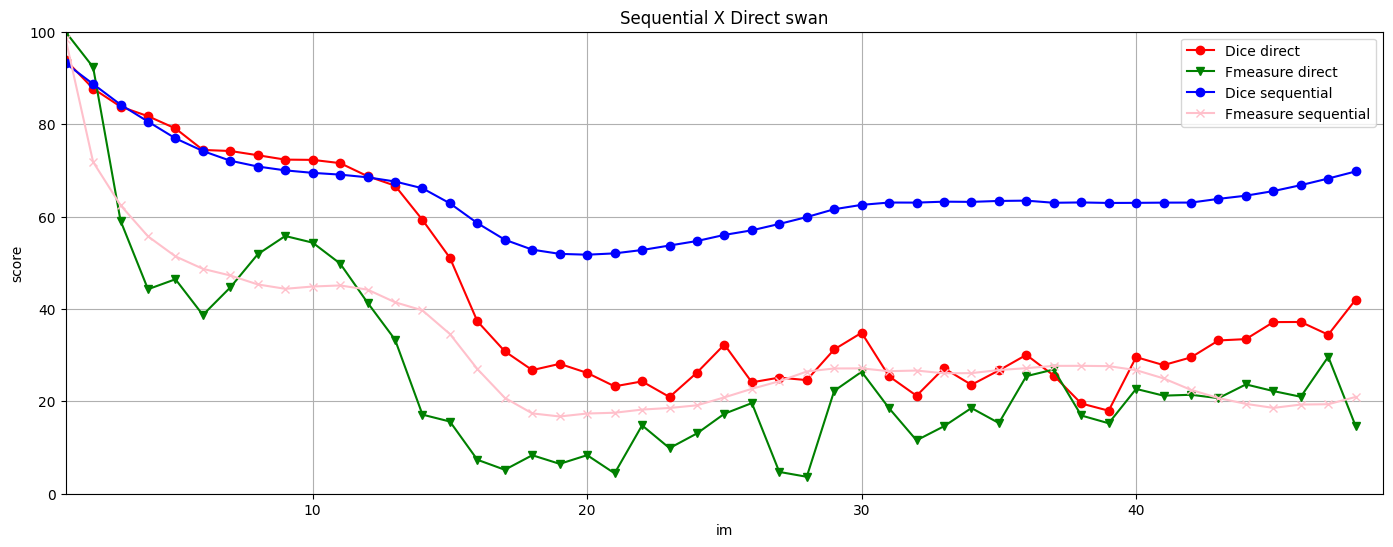

bag


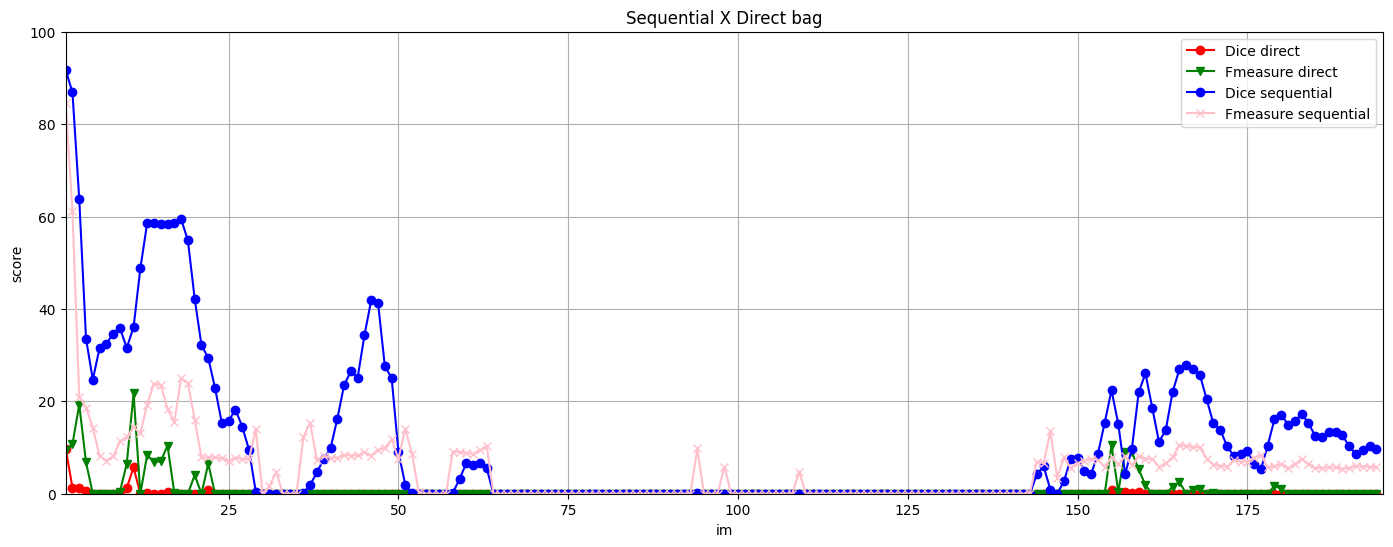

bear


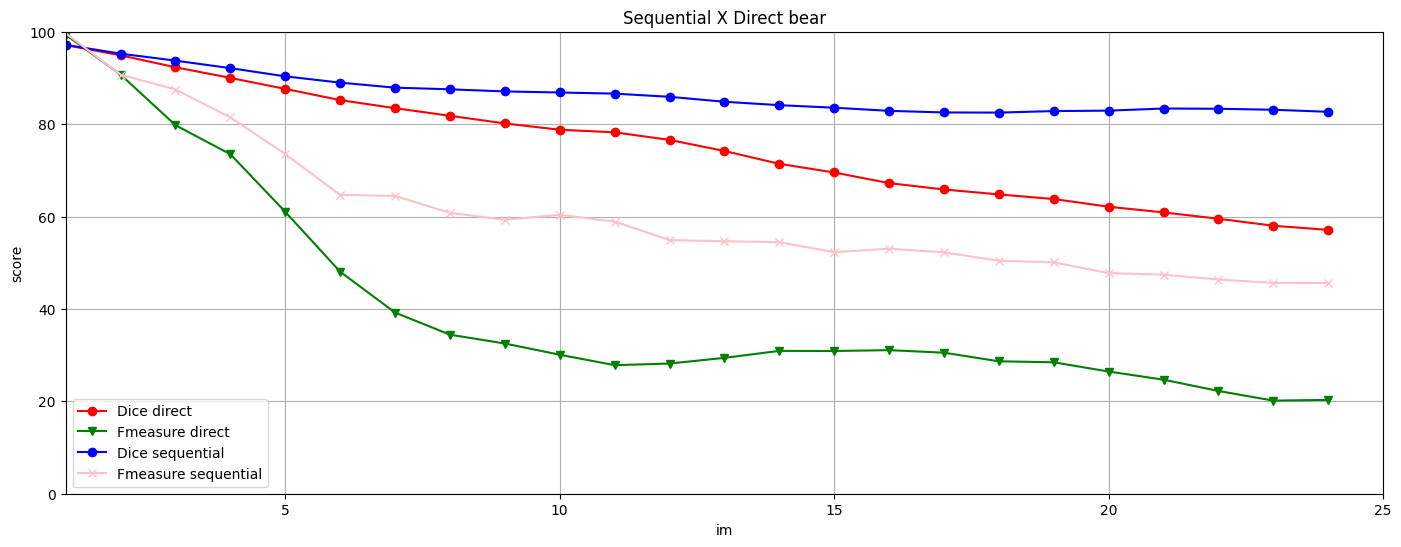

book


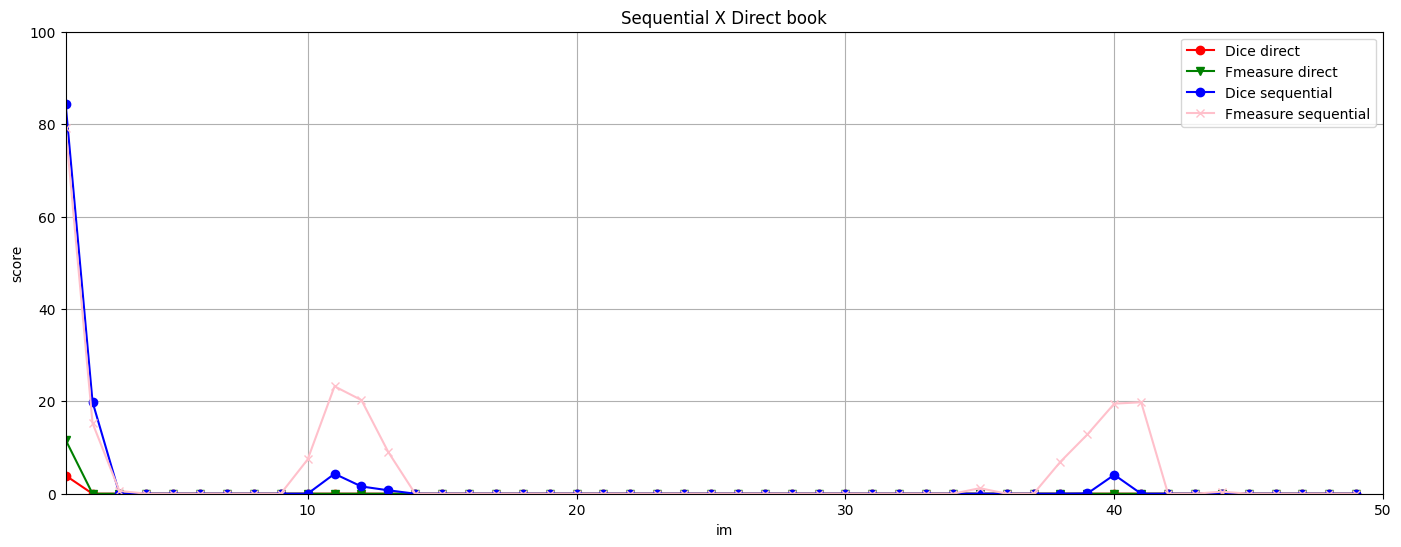

In [8]:
name = ["camel", "rhino", "swan","bag", "bear", "book"]

for i in range(len(name)):

    sequence_files = [f for f in os.listdir('sequences-train') if f.startswith(name[i]) and f.endswith(".bmp")]
    nb_start = 1
    nb_end = len(sequence_files)

    # direct 
    file_path_dice_d ="./results/"+name[i] +"-dice_dir.npy"
    file_path_fmeasures_d ="./results/"+name[i] +"-fmeasures_dir.npy"

    loaded_array_dice_d = np.load(file_path_dice_d)
    loaded_array_fmeasure_d = np.load(file_path_fmeasures_d)

    print(name[i])
  

    # sequential
    file_path_dice_s     ="./results/"+name[i] +"-dice_seq.npy"
    file_path_fmeasures_s ="./results/"+name[i] +"-fmeasures_seq.npy"

    loaded_array_dice_s = np.load(file_path_dice_s)[:-1]
    loaded_array_fmeasure_s = np.load(file_path_fmeasures_s)[:-1]

    # print(np.shape(loaded_array_dice_d))
    # print(np.shape(loaded_array_fmeasure_d))
    # print(np.shape(loaded_array_dice_s))
    # print(np.shape(loaded_array_fmeasure_s))

    loaded_array_dice_d = np.delete(loaded_array_dice_d, -1)
    loaded_array_fmeasure_d = np.delete(loaded_array_fmeasure_d, -1)

    x = range(nb_start,nb_end-1)
    # print(name[i])
    # print(x)
    fig, ax = plt.subplots(figsize=(17, 6))
    ax.set_title("Sequential X Direct " + name[i])
    ax.plot(x,loaded_array_dice_d,marker='o',color='r')
    ax.plot(x,loaded_array_fmeasure_d,marker='v',color='g')

    ax.plot(x,loaded_array_dice_s,marker='o',color='b')
    ax.plot(x,loaded_array_fmeasure_s,marker='x',color='pink')
    

    ax.set_xlim((nb_start,nb_end-1))
    ax.set_ylim((0,100))
    ax.set_ylabel('score')
    ax.set_xlabel("im")
    ax.grid()
    ax.legend(['Dice direct', 'Fmeasure direct ', 'Dice sequential ', 'Fmeasure sequential'])
    plt.savefig('results_total_' + name[i] +'.png')
    plt.show()


# Test Sequences

Visualizing boundaries for sequence: fish


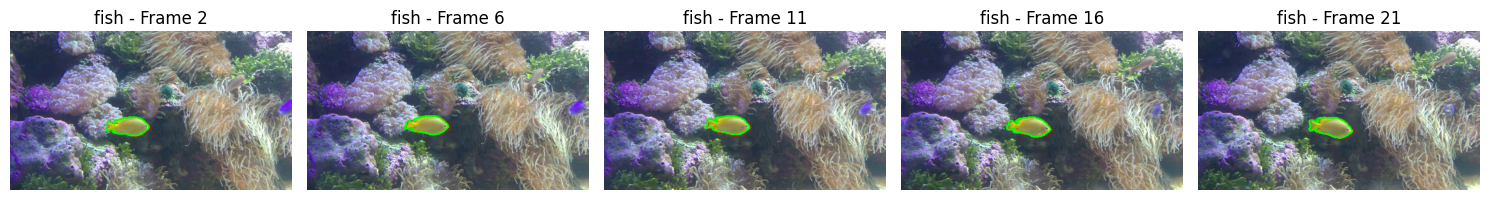

Visualizing boundaries for sequence: octopus


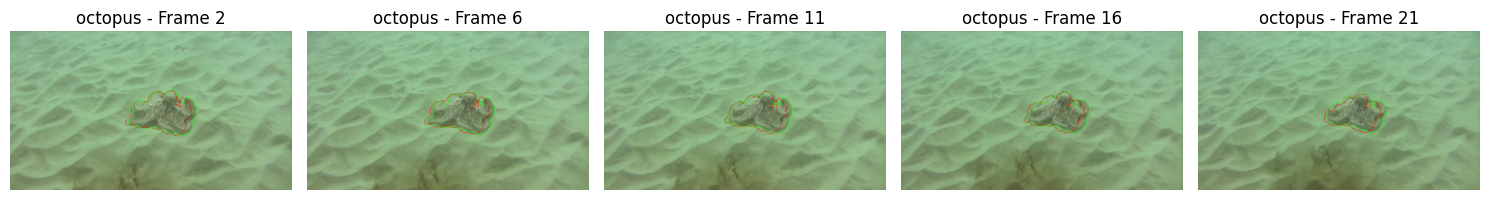

Visualizing boundaries for sequence: cow


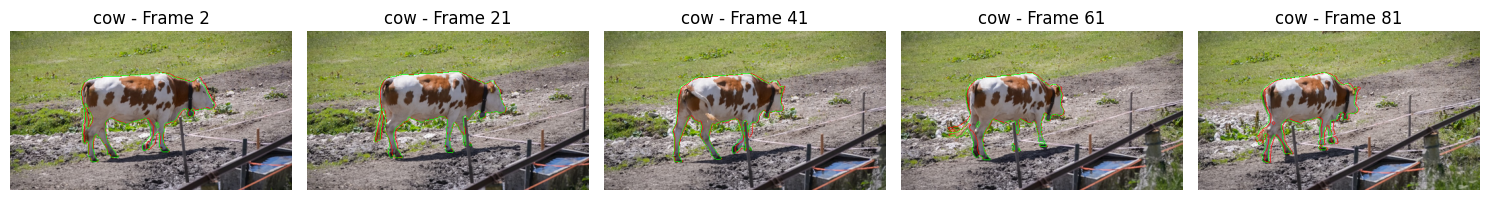

Generating gif for sequence: fish
GIF saved in: results/gif/fish-sequential.gif
Generating gif for sequence: octopus
GIF saved in: results/gif/octopus-sequential.gif
Generating gif for sequence: cow
GIF saved in: results/gif/cow-sequential.gif


In [10]:
image_folder = 'sequences-test'
mode = 'sequential'
# mode = 'direct'

# model = 'finetuned'
model = 'pretrained'

if 'train' in image_folder:
    sequence_list = ['bear', 'book', 'bag', 'camel', 'rhino', 'swan']
else:
    sequence_list = ['fish', 'octopus', 'cow']


# # Visualize boundaries for a single sequence
# sequence = 'bear'
# visualize_boundaries(sequence, mode)

# Visualize boundaries for all sequences
for sequence in sequence_list:
    print(f'Visualizing boundaries for sequence: {sequence}')
    visualize_boundaries(sequence, mode, image_folder)

# # Create GIF for a single sequence
# sequence = 'bear'
# create_gif(sequence, mode, model)


# Create GIF for all sequences
for sequence in sequence_list:
    print(f'Generating gif for sequence: {sequence} with mode: {mode}')
    create_gif(sequence, mode, model, image_folder)


fish


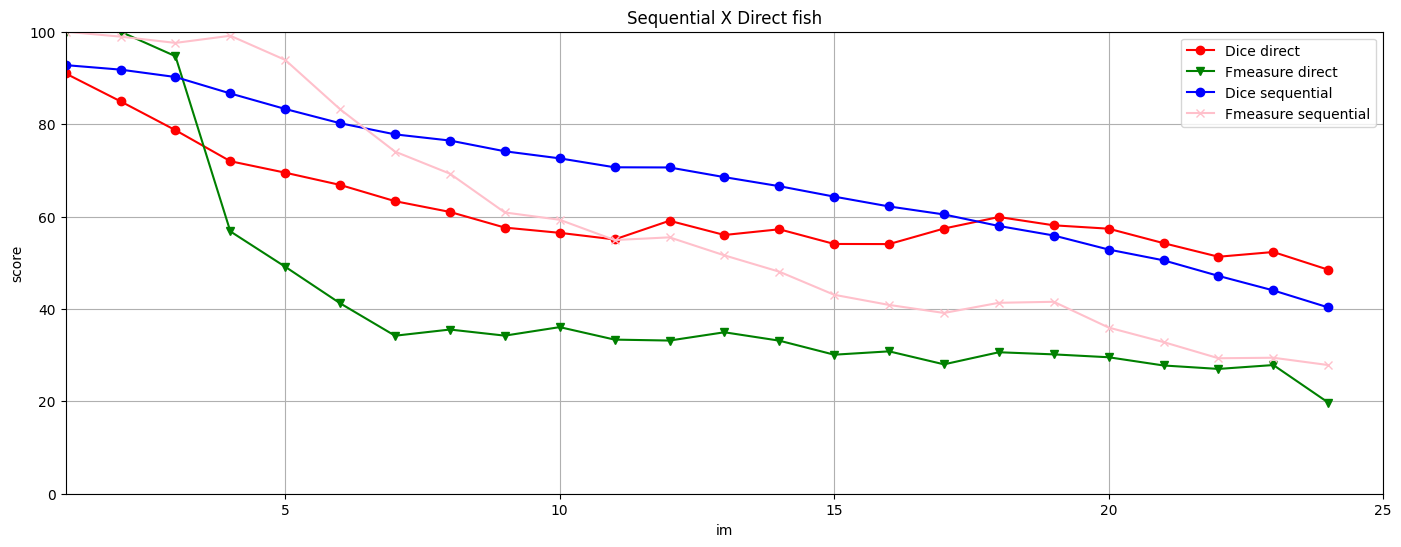

octopus


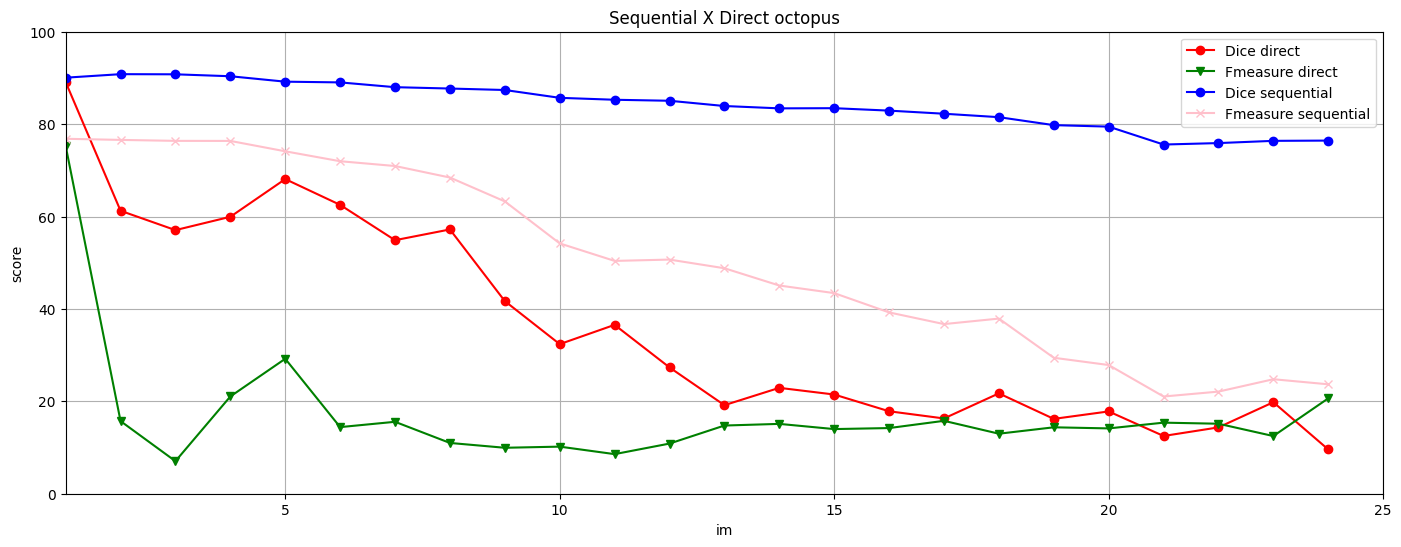

cow


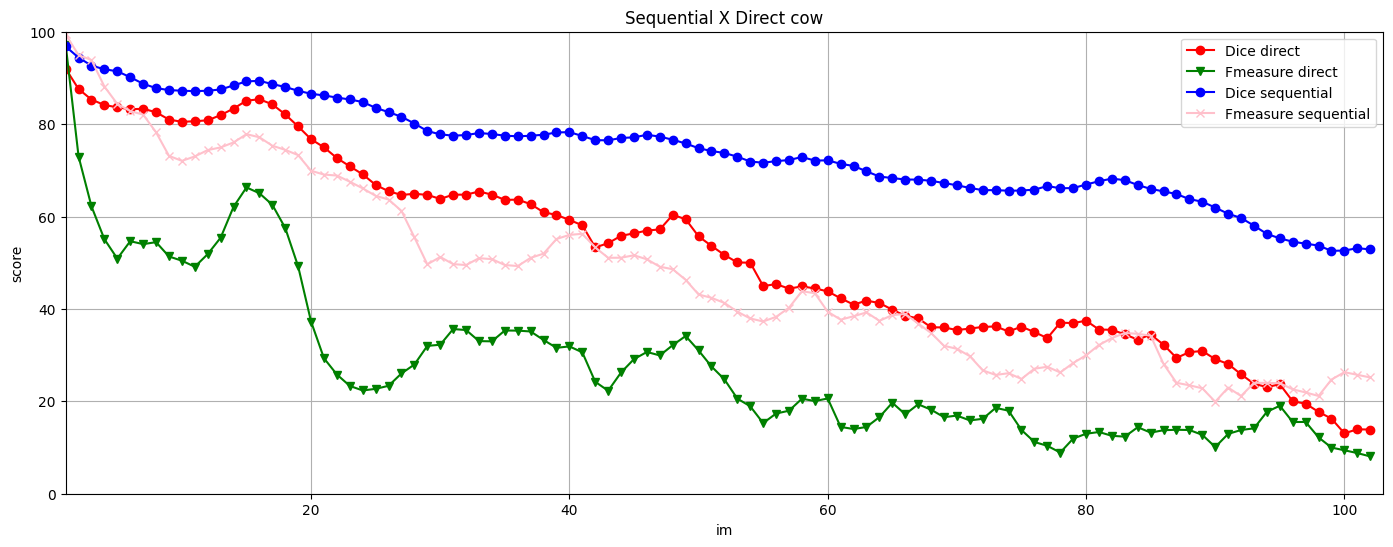

In [12]:
for i in range(len(sequence_list)):

    sequence_files = [f for f in os.listdir('sequences-test') if f.startswith(sequence_list[i]) and f.endswith(".bmp")]
    nb_start = 1
    nb_end = len(sequence_files)

    # direct 
    file_path_dice_d ="./results/"+sequence_list[i] +"-dice_dir.npy"
    file_path_fmeasures_d ="./results/"+sequence_list[i] +"-fmeasures_dir.npy"

    loaded_array_dice_d = np.load(file_path_dice_d)
    loaded_array_fmeasure_d = np.load(file_path_fmeasures_d)

    print(sequence_list[i])
  

    # sequential
    file_path_dice_s     ="./results/"+sequence_list[i] +"-dice_seq.npy"
    file_path_fmeasures_s ="./results/"+sequence_list[i] +"-fmeasures_seq.npy"

    loaded_array_dice_s = np.load(file_path_dice_s)[:-1]
    loaded_array_fmeasure_s = np.load(file_path_fmeasures_s)[:-1]

    loaded_array_dice_d = np.delete(loaded_array_dice_d, -1)
    loaded_array_fmeasure_d = np.delete(loaded_array_fmeasure_d, -1)

    x = range(nb_start,nb_end-1)
    fig, ax = plt.subplots(figsize=(17, 6))
    ax.set_title("Sequential X Direct " + sequence_list[i])
    ax.plot(x,loaded_array_dice_d,marker='o',color='r')
    ax.plot(x,loaded_array_fmeasure_d,marker='v',color='g')

    ax.plot(x,loaded_array_dice_s,marker='o',color='b')
    ax.plot(x,loaded_array_fmeasure_s,marker='x',color='pink')
    

    ax.set_xlim((nb_start,nb_end-1))
    ax.set_ylim((0,100))
    ax.set_ylabel('score')
    ax.set_xlabel("im")
    ax.grid()
    ax.legend(['Dice direct', 'Fmeasure direct ', 'Dice sequential ', 'Fmeasure sequential'])
    plt.savefig('results_total_' + sequence_list[i] +'.png')
    plt.show()
